# Sberbank Russian Housing Market Data Processing

In the first week, we’ll practice data exploration and data analysis in Python with a real-world dataset – Sberbank data, which is available in the [Sberbank Russian Housing Market Kaggle competition](https://www.kaggle.com/c/sberbank-russian-housing-market). Sberbank dataset contains rich and messy data about Russian's housing market. This real-world data will provide you concrete practices for getting started with python. 

This step-by-step mini project will cover the most essential and useful techniques for data analysis in solving a real-world problem with key Python data analysis libraries: pandas and numpy. We’ll go through data loading and data frame creation, selection and query, grouping and function applying, plotting and writing data to file. 

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Question 1: Read the train set and test set of Sberbank dataset from the train.csv and test.csv, and call them train_data and test_data. 

By default, it assumes that the fields are comma-separated.

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
print(train_data.shape)
print(test_data.shape)

(30471, 292)
(7662, 291)


#### Question 2: Merge train and test to one dataframe and call it full_data. 

Hint: The new dataframe should have the rows from train_data followed by rows from test_data. Refer to [merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html). 

In [8]:
test = pd.concat([train_data,test_data],axis=1)
test.shape
# axis = 1 is wrong since they shared the same columns

(30471, 583)

In [9]:
full_data = pd.concat([train_data,test_data],sort=False) # default is axis=0

In [10]:
full_data.shape

(38133, 292)

***For the rest questions, if not specified, we'll do practice on train_data. Let's create a dataframe called df from train_data.***

In [11]:
df = train_data

#### Question 3: Preview the first 10 columns with head()

Hint: You can change the number of rows displayed by specifying a number. There is a similar function tail(), which will show you the last columns of a dataframe.

In [12]:
df.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000


In [13]:
df.tail()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000
30470,30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,5,2,0,7,16,0,9,54,10,5600000


#### Question 4: How many columns and rows are there in the data?

In [15]:
df.shape
# Answer: 30471 Rows , 292 Columns

(30471, 292)

**Question 5: Which features are available in the data? Display the features.**

Hint: The features are the column names. You can print them out.

In [16]:
df.columns.values
# return as a numpy array dtype=object (string)

array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'full_all',
       'male_f', 'female_f', 'young_all', 'young_male',

**Question 6: What's the data type of each column? Save the datatype as data_type.**

In [16]:
df.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [17]:
for i in range(len(df.dtypes)):
    print(df.dtypes.index[i], df.dtypes[i])

id int64
timestamp object
full_sq int64
life_sq float64
floor float64
max_floor float64
material float64
build_year float64
num_room float64
kitch_sq float64
state float64
product_type object
sub_area object
area_m float64
raion_popul int64
green_zone_part float64
indust_part float64
children_preschool int64
preschool_quota float64
preschool_education_centers_raion int64
children_school int64
school_quota float64
school_education_centers_raion int64
school_education_centers_top_20_raion int64
hospital_beds_raion float64
healthcare_centers_raion int64
university_top_20_raion int64
sport_objects_raion int64
additional_education_raion int64
culture_objects_top_25 object
culture_objects_top_25_raion int64
shopping_centers_raion int64
office_raion int64
thermal_power_plant_raion object
incineration_raion object
oil_chemistry_raion object
radiation_raion object
railroad_terminal_raion object
big_market_raion object
nuclear_reactor_raion object
detention_facility_raion object
full_all int64
m

In [17]:
df.dtypes.groupby(by=df.dtypes.values).size()

int64      157
float64    119
object      16
dtype: int64

**Question 7: Which variables are numerical variables (excluding 'id')? Put all the numerical variable in list.**

Hint: Use the index of the data_type we just created in Q5. The data type of numerical variables should be int or float. Remenber to remove the 'id'.

In [20]:
# option 1: select_types()
numerical_variables = df.select_dtypes(include=['float64','int64']).columns.values.tolist()
numerical_variables = numerical_variables[1:] # remove the id OR remove()
numerical_variables[0:5]

['full_sq', 'life_sq', 'floor', 'max_floor', 'material']

In [21]:
# option 2
num_vars = list(df.dtypes[df.dtypes=='int64'].index) + list(df.dtypes[df.dtypes=='float64'].index)
num_vars.remove('id')
num_vars[:5]

['full_sq',
 'raion_popul',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school']

In [23]:
print('The number of numerical varaibles is: ',len(numerical_variables))
print('The number of numerical varaibles is: ',len(num_vars))

The number of numerical varaibles is:  275
The number of numerical varaibles is:  275


#### Question 8: Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data. 


In [24]:
df[['id','price_doc']].head(5) # option 1

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [25]:
df[['id','price_doc']][:5] # option 2

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [29]:
df.loc[:4,['id','price_out']] # option 3

,id,price_out
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


**Question 9: Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.**

Hint: You can use boolean indexing or query. Try both methods.

In [31]:
# indexing method option 1
df.loc[(df['full_sq'] > 10) & (df['full_sq'] < 1500)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [26]:
# option 2
df[(df.full_sq > 10) & (df.full_sq < 1500)] # return a copy

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [27]:
# query method
df.query('full_sq > 10 & full_sq < 1500') # return a copy not change on df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**Question 10: Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.**

In [28]:
# step 1: get the filtered data's index
sq_index = df.query('full_sq < life_sq').index
# step 2: use the index to assign values
df.loc[sq_index,'life_sq'] = np.NaN

In [29]:
# one line solution: df.loc[selection criteria, columns I want] = value
df.loc[(df['full_sq'] < df['life_sq']),'life_sq'] = np.NaN

#### Question 11: Check how many rows in life_sq are NAN? 

In [32]:
df['life_sq'].isnull().sum()

6420

In [31]:
df.life_sq.isnull().value_counts()

False    24051
True      6420
Name: life_sq, dtype: int64

**Question 12: The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?**

In [33]:
df['product_type'].value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [20]:
Investment_percent = 19448 / df['product_type'].count() #("%.2f" % a)
owneroccupier_percent = 11023 / df['product_type'].count()
print('The percentage of {} tpye in housing is: {}'.format('Investment', '%.2f' % (Investment_percent*100)))
print('The percentage of {} tpye in housing is: {}'.format('OwnerOccupier', '%.2f' % (owneroccupier_percent*100)))

The percentage of Investment tpye in housing is: 63.82
The percentage of OwnerOccupier tpye in housing is: 36.18


In [37]:
df.product_type.value_counts(normalize=True) # default para

Investment       0.638246
OwnerOccupier    0.361754
Name: product_type, dtype: float64

**Question 13: Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.**

Hint: First select the two columns, then group and aggregate. If you choose .aggragate() method, use np.median for the median calculation.

In [34]:
df[['product_type','price_doc']].groupby('product_type').median()

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


In [40]:
df[['product_type','price_doc']].groupby('product_type').aggregate(np.median)

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


In [35]:
df.pivot_table(index='product_type', values='price_doc',aggfunc=np.median)

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


#### Question 14: Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped

In [43]:
grouped = df.id.groupby([df.product_type,df.state]).count()
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
Name: id, dtype: int64

In [41]:
df.groupby(['product_type','state']).size()

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

**Question 15: Unstack the state index in grouped.**

Hint: Use unstack() to turn the index values in state into column names.

In [44]:
grouped.unstack()

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,520.0,5802.0,5653.0,413.0,1.0
OwnerOccupier,4335.0,42.0,137.0,9.0,NaN


**Question 16: Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.**


In [36]:
# option 1
df['room_size'] = df['life_sq'] / df['num_room']
# option 2
df[['life_sq','num_room']].apply(lambda x:x[0]/x[1],axis=1)
df['room_size'].sample(3)

29345     NaN
28791    21.0
10563     NaN
Name: room_size, dtype: float64

In [38]:
df['room_size'].isnull().sum()

13739

#### Quesion 17: Change the format of timestamp to '%Y-%m-%d'. 

Hint: For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [40]:
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d')
df.sample(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,room_size
7343,7346,2013-04-16,45,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,2,0,1,12,1,0,8,0,4595500,NaN
17753,17756,2014-04-23,54,28.0,8.0,16.0,5.0,1974.0,2.0,12.0,...,91,18,97,183,1,76,175,11,11800000,14.0
12837,12840,2013-12-05,45,29.0,5.0,5.0,1.0,1965.0,2.0,5.0,...,2,0,6,12,0,2,38,5,3000000,14.5


**Question 18: Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.**

Hint: you can use apply() to apply functions to the data.

In [41]:
df['ts_year'] = df['timestamp'].dt.year

df['ts_dayofweek'] = df['timestamp'].dt.weekday

df.loc[0:5,['timestamp','ts_year','ts_dayofweek']]

,timestamp,ts_year,ts_dayofweek
0,2011-08-20,2011,5
1,2011-08-23,2011,1
2,2011-08-27,2011,5
3,2011-09-01,2011,3
4,2011-09-05,2011,0
5,2011-09-06,2011,1


In [ ]:
# Use apply()
df['ts_year'] = df['timestamp'].apply(lambda x:x.year)
df['ts_dayofweek'] = df['timestamp'].apply(lambda x:x.dayofweek)

**Question 19: Draw histogram of price to see the distribution.**

Hint: You can use matplotlib or pandas for this histogram. 

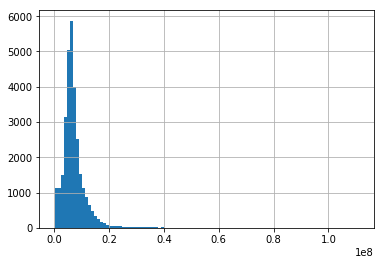

In [50]:
df['price_doc'].hist(bins=100)

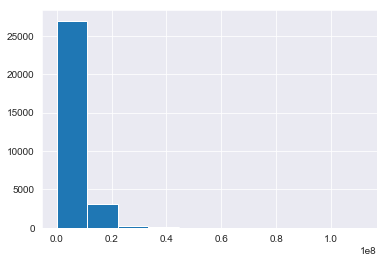

In [52]:
_ = plt.hist(df['price_doc'])

**Question 20: From the plot in Q15, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.**

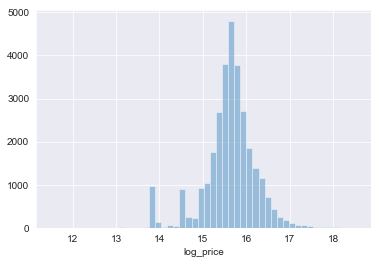

In [51]:
# log transform
df['log_price'] = np.log(df['price_doc'].values)
sns.set_style('darkgrid')
sns.distplot(df['log_price'],kde=False)

** Question 21: Drop the log_price column.**

In [31]:
df.drop(['log_price'],axis=1,inplace=True)
df.head(2)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,room_size,ts_year,ts_dayofweek
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,13,22,1,0,52,4,5850000,NaN,2011,5
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,29,1,10,66,14,6000000,NaN,2011,1


**Question 22: Save the dataframe we have now to train_new.csv file**

In [33]:
df.to_csv('train_new.csv', sep=',', index=False,encoding='utf-8')

**Now you've finished basic data processing for Sberbank dataset.**